## Importing data & packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load the data
travel_train = pd.read_csv("Traveldata_train.csv")
travel_test = pd.read_csv("Traveldata_test.csv")
survey_train = pd.read_csv("Surveydata_train.csv")
survey_test = pd.read_csv("Surveydata_test.csv")

## Mark training & testing column

In [6]:
# Create x and y train
df_train = pd.concat([travel_train, survey_train], axis = 1)
df_train.drop(columns = 'ID', inplace=True)
df_train['Data_Source'] = "train"
df_train_y = df_train['Overall_Experience']
df_train_x = df_train.drop(columns = 'Overall_Experience')

In [7]:
# Create x test
df_test_x = pd.concat([travel_test, survey_test], axis = 1)
df_test_x.drop(columns = 'ID', inplace=True)
df_test_x['Data_Source'] = "test"

In [8]:
df_test_x.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Data_Source
0,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,...,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor,test
1,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,...,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable,test
2,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,...,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent,test
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,...,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor,test
4,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent,test


In [9]:
pd.set_option('display.max_columns', None)
df_train_x.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Data_Source
0,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,train
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,train
2,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,train
3,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,train
4,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,train


In [10]:
# Check the possible values of Online_Boarding variable
list(set(list(df_train_x['Online_boarding'])))

['need improvement',
 'poor',
 nan,
 'excellent',
 'acceptable',
 'good',
 'extremely poor']

## Data pre-processing

In [12]:
# Concatinate training and testing X
concat_X = pd.concat([df_train_x, df_test_x], axis = 0)

In [13]:
# Categorical variable transformation (Since most of the categorical variables are ordinal in nature)
# Create a dictionary that is ordinal
ex_dict = {
 'extremely poor': 0,
 'poor': 1,
 'need improvement' : 2,
 'acceptable' : 3,
 'good' : 4,
 'excellent' : 5
}

In [14]:
# Apply the dictionary to each of the ordinal variable
concat_X['Seat_comfort'] = concat_X['Seat_comfort'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Arrival_time_convenient'] = concat_X['Arrival_time_convenient'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Catering'] = concat_X['Catering'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Onboardwifi_service'] = concat_X['Onboardwifi_service'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Onboard_entertainment'] = concat_X['Onboard_entertainment'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Online_support'] = concat_X['Online_support'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Onlinebooking_Ease'] = concat_X['Onlinebooking_Ease'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Onboard_service'] = concat_X['Onboard_service'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Leg_room'] = concat_X['Leg_room'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Baggage_handling'] = concat_X['Baggage_handling'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Checkin_service'] = concat_X['Checkin_service'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Cleanliness'] = concat_X['Cleanliness'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Online_boarding'] = concat_X['Online_boarding'].apply(lambda x: ex_dict.get(x, float("nan")))

In [15]:
# There is another version of the ordinal variable in this dataset, repeat previous steps
ex_dict_2 = {
 'very inconvenient': 0,
 'Inconvenient': 1,
 'need improvement' : 2,
 'manageable' : 3,
 'Convenient' : 4,
 'very convenient' : 5
}

In [16]:
# Apply the second dictionary
concat_X['Platform_location'] = concat_X['Platform_location'].apply(lambda x: ex_dict_2.get(x, float("nan")))

In [17]:
# Create dummy variables for the non-ordinal categorical variables
concat_X_dummy = pd.get_dummies(concat_X, drop_first = True)

In [18]:
concat_X_dummy

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary,Data_Source_train
0,52.0,272,0.0,5.0,2.0,5.0,5.0,NaN,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,False,False,False,False,False,True
1,48.0,2200,9.0,0.0,1.0,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0,True,False,True,True,True,True
2,43.0,1061,77.0,119.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,False,False,False,False,False,True
3,44.0,780,13.0,18.0,3.0,2.0,NaN,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,False,False,False,False,True,True
4,50.0,1981,0.0,0.0,3.0,3.0,3.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,8.0,1334,0.0,0.0,2.0,5.0,2.0,3.0,3.0,2.0,3.0,3.0,4.0,5.0,4.0,3.0,4.0,3.0,True,False,True,True,False,False
35598,53.0,1772,0.0,0.0,2.0,2.0,4.0,2.0,3.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,False,False,False,False,True,False
35599,22.0,1180,0.0,0.0,4.0,0.0,4.0,2.0,2.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0,5.0,2.0,True,True,False,True,False,False
35600,67.0,420,23.0,16.0,5.0,5.0,5.0,NaN,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,False,False,True,True,True,False


In [19]:
# Split back into X_training & X_testing
x_train_dummy = concat_X_dummy[concat_X_dummy['Data_Source_train'] == 1]
x_test_dummy = concat_X_dummy[concat_X_dummy['Data_Source_train'] == 0]

In [20]:
# Delete data_source variable
x_train_dummy.drop(columns = 'Data_Source_train', inplace = True)
x_test_dummy.drop(columns = 'Data_Source_train', inplace = True)

In [21]:
# Add the y_training column into the x_training table
x_train_dummy['Overall_Experience'] = df_train_y

In [22]:
# Impute missing value for training data (using KNN imputer)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
df_imputed_train = imputer.fit_transform(x_train_dummy)
x_train_dummy.iloc[:] = df_imputed_train

In [23]:
# Impute missing value for testing data (using KNN imputer)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
df_imputed_test = imputer.fit_transform(x_test_dummy)
x_test_dummy.iloc[:] = df_imputed_test

In [24]:
# Verify no more missing data
(x_train_dummy.isnull().sum() / x_train_dunmmy.shape[0])*100

NameError: name 'x_train_dunmmy' is not defined

In [25]:
# Import packages for scalers
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [27]:
# Scaling the numeric data for training
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(x_train_dummy)
train_scaled = pd.DataFrame(train_scaled, index = x_train_dummy.index, columns = x_train_dummy.columns)

In [29]:
# Scaling the numeric data for testing
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(x_test_dummy)
test_scaled = pd.DataFrame(test_scaled, index = x_test_dummy.index, columns = x_test_dummy.columns)

In [31]:
# Split training dataset into training and validation sets
train_final, validation_final = train_test_split(train_scaled, test_size = 0.2, train_size = 0.8, random_state=42)

In [33]:
# Standarize the names so that the testing data is called test_final
test_final = test_scaled

## Exploratory Data Analysis

In [38]:
# Outlier Detection (outliers Q3 + 1.5IQR)
train_final['DepartureDelay_in_Mins'].describe()

count    75503.000000
mean         0.009235
std          0.024188
min          0.000000
25%          0.000000
50%          0.000000
75%          0.007538
max          1.000000
Name: DepartureDelay_in_Mins, dtype: float64

In [40]:
# Outlier Detection (outliers Q3 + 1.5IQR)
train_final['Age'].describe()

count    75503.000000
mean         0.415424
std          0.193980
min          0.000000
25%          0.256410
50%          0.423077
75%          0.564103
max          1.000000
Name: Age, dtype: float64

(0.0, 100.0)

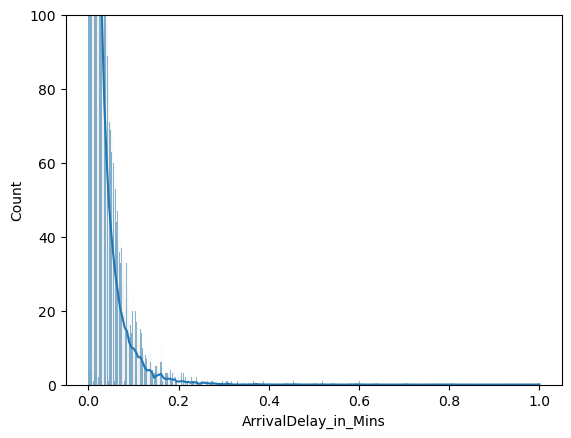

In [44]:
#EDA for numeric variable
fig, ax = plt.subplots()
sns.histplot(x = 'ArrivalDelay_in_Mins', data = train_final, kde = True, ax = ax);
#ax.set_xlim(5000,7000)
ax.set_ylim(0,100)

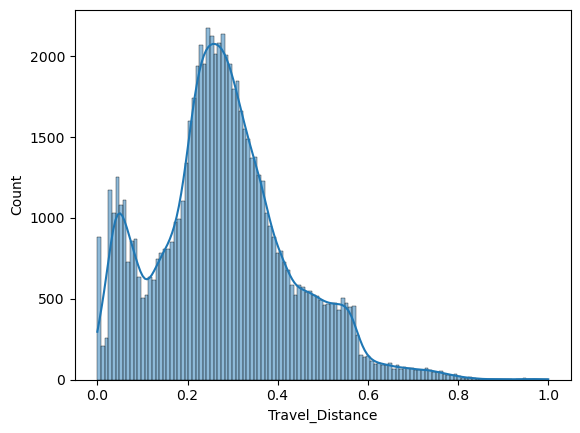

In [45]:
#EDA for numeric variable
fig, ax = plt.subplots()
sns.histplot(x = 'Travel_Distance', data = train_final, kde = True, ax = ax);
#ax.set_xlim(5000,7000)
#ax.set_ylim(0,100)

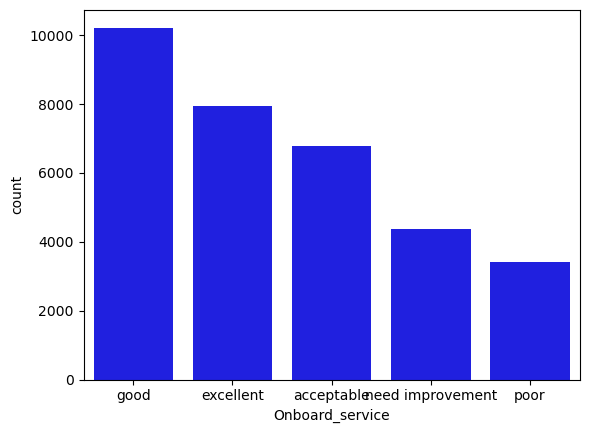

In [52]:
sns.countplot(x = 'Onboard_service', data = df_test_x, color = 'blue', 
              order = df_test_x['Onboard_service'].value_counts().index);

In [54]:
pd.set_option('display.max_columns', None)
df_test_x.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Data_Source
0,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor,test
1,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable,test
2,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent,test
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor,test
4,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent,test


In [56]:
df_test_x.describe()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,35591.000000,35602.000000,35573.000000,35479.000000
mean,39.446995,1987.151761,14.880696,15.308802
std,15.137554,1024.308863,37.895453,38.531293
min,7.000000,50.000000,0.000000,0.000000
25%,27.000000,1360.000000,0.000000,0.000000
50%,40.000000,1929.000000,0.000000,0.000000
75%,51.000000,2559.000000,13.000000,13.000000
max,85.000000,6868.000000,978.000000,970.000000


(0.0, 100.0)

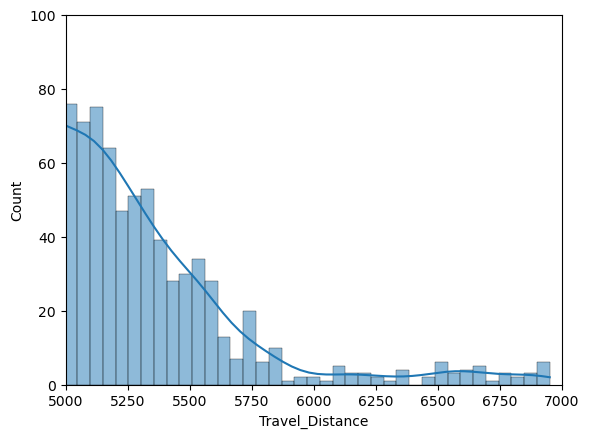

In [58]:
fig, ax = plt.subplots()
sns.histplot(x = 'Travel_Distance', data = df_train, kde = True, ax = ax);
ax.set_xlim(5000,7000)
ax.set_ylim(0,100)

## Export the data

In [61]:
train_final.to_csv("train_final.csv", index=False)
validation_final.to_csv("validation_final.csv", index=False)
test_final.to_csv("test_final.csv", index=False)